Выпишем явно тензор натяжений: 

$$
\hat{A}_B = 
\begin{pmatrix}
\dfrac{p_1}{2} & n_1u_xu_y & n_1u_xu_z\\
n_1u_xu_y & \dfrac{p_1}{2} & n_1u_yu_z\\
n_1u_xu_z & n_1u_yu_z & \dfrac{p_1}{2}
\end{pmatrix}
$$

Матрица поворота задается следующим образом: 

$$
\hat{\cal {O}} = 
\begin{pmatrix}
\cos{\alpha} & 0 & \sin{\alpha}\\
0 & 1 & 0\\
-\sin{\alpha} & 0 & \cos{\alpha}
\end{pmatrix}
$$

Где:
$$ \cos{\alpha} = \dfrac{B_z}{\sqrt{B_x^2+B_z^2}} $$


$$\\ \sin{\alpha} =- \dfrac{B_x}{\sqrt{B_x^2+B_z^2}} $$

После преобразование $A_B = \hat{\cal {O}}\ A\ \hat{\cal {O}}^T $, учитывая определение анизотропии $\Lambda =\dfrac{2p_{||}-p_{\perp1} - p_{\perp2}}{4B^2}$  получим для нее выражение: 

$$
\Lambda = -\dfrac{3\cos{\alpha} \sin{\alpha} \ n_1u_xu_z}{2B^2}
$$

Теперь добавляем холодные протоны, из-за чего меняется $p_e$ : 

$$
p_e = (2+a_c)n_1\beta_e 
$$

Тогда система дифференциальных уравнений преобразуется в следующую систему: 

$$
\begin{cases}
\dfrac{dB_x}{dz} = nu_y  - \dfrac{d \left(\Lambda B_x \right) }{dz}\\ 
\\
\dfrac{du_y}{dz} = B_x(1-n) \\
\\
\dfrac{d}{dz} \left(\dfrac{B^2_z}{n} + \dfrac{\beta_i n^{\gamma}}{2} + \dfrac{1}{4} (2+\alpha_c)n\beta_e \right) = -B_xnu_y \\
\end{cases} 
$$

In [3]:
from scipy.integrate import solve_ivp
import numpy as np

In [98]:
def plasma(t,z,a,b,c,d,p): #a = B_z, b = gamma, c = beta_i, d = beta_e, p - alpha_c
    x, y, n = z #x = Bx, y = uy
    return [n*y/(1+3/4*a**2*(3*x**2*(x**2+a**2)**2-4*x**4*(x**2+a**2))/(x**2+a**2)**4), 
            x*(1-n),
            -x*y*n/(c*b*n**(b-1)/2+(2+p)*d/4-(a**2/n**2))]

In [250]:
sol = solve_ivp(plasma,[0,4],[0,0.412,1.42], args=(0.05, 5/3, 1, 0.5, 1), rtol = 1e-12,atol = 1e-14)

In [229]:
import matplotlib.pyplot as plt

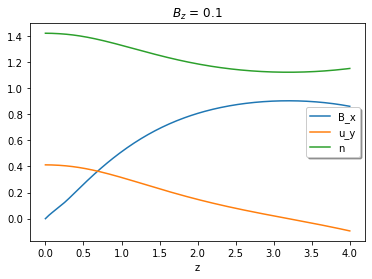

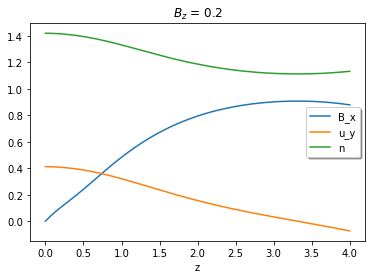

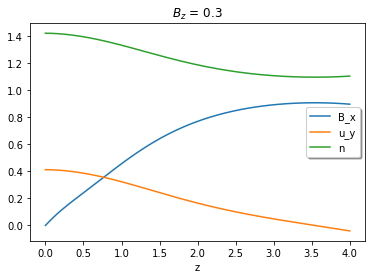

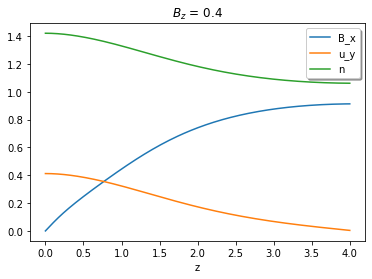

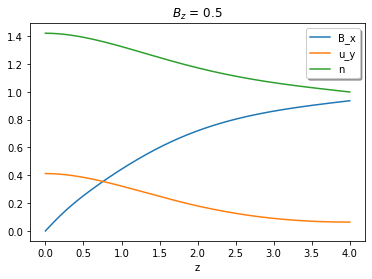

In [245]:
for i in range(1,6):
    sol1 = solve_ivp(plasma,[0,4],[0,0.412,1.42], args=(0.1*i, 5/3, 1, 0.5, 1), rtol = 1e-12,atol = 1e-14)
    t = sol1.t
    z = sol1.y
    plt.figure()
    plt.plot(t,z.T)
    plt.xlabel('z')
    plt.title('$B_z$ = %.1f' % (0.1*i))
    plt.legend(['B_x', 'u_y','n','J_y'], shadow=True)
    plt.show()